In [1]:
# Get data and dependencies

! git clone https://www.github.com/DS3001/group16
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Cloning into 'group16'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (80/80), done.
remote: Total 91 (delta 39), reused 29 (delta 10), pack-reused 0
Receiving objects: 100% (91/91), 3.79 MiB | 11.17 MiB/s, done.
Resolving deltas: 100% (39/39), done.


In [2]:
# Create Training and Testing DataFrames

train = pd.read_csv('/content/group16/project_2/cleaned_data/c_train.csv')
test = pd.read_csv('/content/group16/project_2/cleaned_data/c_test.csv')

columns = train.columns
all_metrics = columns[1:-1]
no_poly = columns[1:23]
no_poly

# Create y values, and X values in with all metrics taken into account

X_train = train[all_metrics]
y_train = train['stroke']
X_test = test[all_metrics]
y_test = test['stroke']

# Create X values for only original metrics, not metrics from polynomial expansion

X_train_np = train[no_poly]
X_test_np = test[no_poly]

columns
cat2 = columns[7:23].to_list()
cat = columns[2:4].to_list()
categories = cat + cat2

# Create X values for only categorical data, not linear data

X_train_cat = train[categories]
X_test_cat = test[categories]


In [3]:
# Create and test trees of different max depths for the whole data

all_r2 = []
all_rmse = []

for i in range(1,100):
  model = tree.DecisionTreeClassifier(max_depth=i)
  cart = model.fit(X_train, y_train)

  prediction = cart.predict(X_test)
  r2 = r2_score(y_test,prediction)
  RMSE = np.sqrt(mean_squared_error(y_test,prediction))
  all_r2.append(r2)
  all_rmse.append(RMSE)

print('Highest r2 value: ' + str(max(all_r2)))
print('Depth: ' + str(all_r2.index(max(all_r2)) + 1))
print('Lowest RMSE value: ' + str(min(all_rmse)))
print('Depth: ' + str(all_rmse.index(min(all_rmse)) + 1))

Highest r2 value: -0.05138746145940387
Depth: 1
Lowest RMSE value: 0.22107884414269094
Depth: 1


In [4]:
# Create and test trees of different max depths without the polynomials

poly_r2 = []
poly_rmse = []

for i in range(1,20):
  model = tree.DecisionTreeClassifier(max_depth=i)
  cart = model.fit(X_train_np, y_train)

  prediction = cart.predict(X_test_np)
  r2 = r2_score(y_test,prediction)
  RMSE = np.sqrt(mean_squared_error(y_test,prediction))
  poly_r2.append(r2)
  poly_rmse.append(RMSE)

print('Highest r2 value: ' + str(max(poly_r2)))
print('Depth: ' + str(poly_r2.index(max(poly_r2)) + 1))
print('Lowest RMSE value: ' + str(min(poly_rmse)))
print('Depth: ' + str(poly_rmse.index(min(poly_rmse)) + 1))

Highest r2 value: -0.05138746145940387
Depth: 1
Lowest RMSE value: 0.22107884414269094
Depth: 1


In [5]:
# Create and test trees of different max depths for only categorical data

cat_r2 = []
cat_rmse = []

for i in range(1,100):
  model = tree.DecisionTreeClassifier(max_depth=i)
  cart = model.fit(X_train_cat, y_train)

  prediction = cart.predict(X_test_cat)
  r2 = r2_score(y_test,prediction)
  RMSE = np.sqrt(mean_squared_error(y_test,prediction))
  cat_r2.append(r2)
  cat_rmse.append(RMSE)

print('Highest r2 value: ' + str(max(cat_r2)))
print('Depth: ' + str(cat_r2.index(max(cat_r2)) + 1))
print('Lowest RMSE value: ' + str(min(cat_rmse)))
print('Depth: ' + str(cat_rmse.index(min(cat_rmse)) + 1))

Highest r2 value: -0.03035971223021572
Depth: 4
Lowest RMSE value: 0.21885688981825285
Depth: 4


-0.03035971223021572
0.21885688981825285


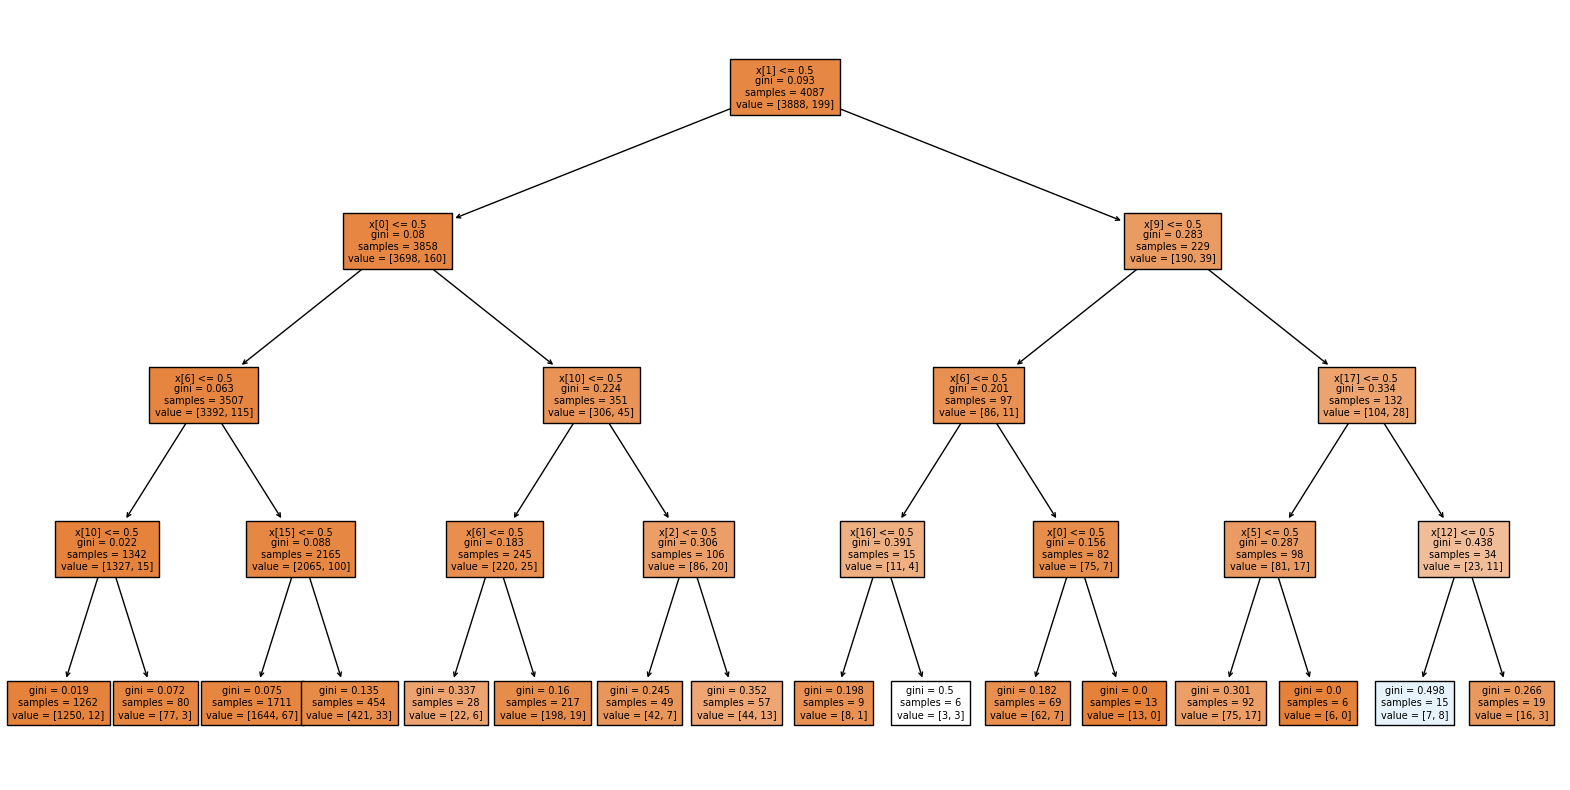

In [15]:
# Full model of only categorical variables, with max depth of 4
# This had the lowest RMSE and the highest r2

model = tree.DecisionTreeClassifier(max_depth=4)
cart = model.fit(X_train_cat,y_train)

prediction = cart.predict(X_test_cat)
r2 = r2_score(y_test,prediction)
RMSE = np.sqrt(mean_squared_error(y_test,prediction))

print(r2)
print(RMSE)

# Graph it

tree.plot_tree(model,filled=True,fontsize=7)
fig = plt.gcf()
fig.set_size_inches(20, 10)